# Count Vectorization and Multinomial Naive Bayes Model

In [1]:
# Standard data science imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in X_train, X_test, y_train, y_test

X_train=pd.read_csv('../datasets/X_train.csv')['selftext']
X_test=pd.read_csv('../datasets/X_test.csv')['selftext']
y_train=pd.read_csv('../datasets/y_train.csv')['subreddit']
y_test=pd.read_csv('../datasets/y_test.csv')['subreddit']

In [3]:
# print to quick check on datasets

print(X_train.shape)
pd.DataFrame(X_train).head()

(1364,)


,selftext
0,one of our housekeeper is pretty known for bei...
1,i run a small hotel with a hand operated eleva...
2,tonight i had a couple of obviously homeless f...
3,i m not looking forward into going to work ton...
4,an earlier post today about a lady not underst...


In [4]:
print(X_test.shape)
pd.DataFrame(X_test).head()

(455,)


,selftext
0,my poor coworker who is black but an absolute ...
1,before i begin i want to point out that no one...
2,i ve been working at a restaurant for five yea...
3,mini rant the joy of mood swing at work just h...
4,another tale from the crazy night audit lady t...


In [5]:
print(y_train.shape)
pd.DataFrame(y_train).head()

(1364,)


,subreddit
0,1
1,1
2,1
3,0
4,1


In [6]:
print(y_test.shape)
pd.DataFrame(y_test).head()

(455,)


,subreddit
0,0
1,1
2,0
3,1
4,1


In [7]:
# Model imports

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Count Vectorization and Multinomial Naive Bayes combined into a Pipeline

Running GridSearchCV and tuning the hyperparameters accordingly to optimize the model.

In [8]:
# setting my cv_var as 10

cv_var=10

In [9]:
# Instantiating pipeline for Count Vectorization and Multinomial Naive Bayes

# Count Vectorizer object will have token pattern = "[a-z]+[']?[a-z]*".
# It will allow words like 'I've' stay as they are.
# It will also remove pure numbers.
# 'english' stop_words removed.

pipe_cvec_mnb = Pipeline([
    ("cvec", CountVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("mnb", MultinomialNB())
    ])


In [10]:
pipe_params_cvec_mnb = {
    'cvec__max_features': [20, 30, 50],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range':[(1,1),(1,2)]
    
}




In [11]:
# Fitting and running GridSearchCV

gs_cvec_mnb = GridSearchCV(pipe_cvec_mnb, param_grid=pipe_params_cvec_mnb, cv=cv_var, n_jobs = -2, verbose=1)
gs_cvec_mnb.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [12]:
print(gs_cvec_mnb.best_score_)
gs_cvec_mnb.best_params_

0.8980938416422287


{'cvec__max_df': 0.3,
 'cvec__max_features': 50,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [13]:
gs_cvec_mnb.score(X_train, y_train)

0.9010263929618768

In [14]:
gs_cvec_mnb.score(X_test, y_test)

0.9230769230769231

Further tune hyperparameters to achieve a better score:

In [15]:
pipe_params_cvec_mnb_final = {
    'cvec__max_features': [50, 250, 500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.3, .5, .7],
    'cvec__ngram_range':[(1,1),(1,2)]
}

In [16]:
# Fitting and running GridSearchCV with revised parameters

gs_cvec_mnb_final = GridSearchCV(pipe_cvec_mnb, param_grid=pipe_params_cvec_mnb_final, cv=cv_var, n_jobs = -2 ,verbose=1)
gs_cvec_mnb_final.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [17]:
print(gs_cvec_mnb_final.best_score_)
gs_cvec_mnb_final.best_params_

0.9604105571847508


{'cvec__max_df': 0.7,
 'cvec__max_features': 500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [18]:
print(f"Train Accuracy: {gs_cvec_mnb_final.score(X_train, y_train)}")

Train Accuracy: 0.966275659824047


In [19]:
print(f"Test Accuracy: {gs_cvec_mnb_final.score(X_test, y_test)}")

Test Accuracy: 0.967032967032967


### Predictions and Confusion Matrix

In [20]:
# Generate predictions

preds_cvec_mnb_final = gs_cvec_mnb_final.predict(X_test)

In [21]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [22]:
# Generate a confusion matrix.

confusion_matrix(y_test, preds_cvec_mnb_final)

array([[230,   8],
       [  7, 210]], dtype=int64)

In [23]:
tn_cvec_mnb, fp_cvec_mnb, fn_cvec_mnb, tp_cvec_mnb = confusion_matrix(y_test, preds_cvec_mnb_final).ravel()

In [24]:
print("True Negatives: %s" % tn_cvec_mnb)
print("False Positives: %s" % fp_cvec_mnb)
print("False Negatives: %s" % fn_cvec_mnb)
print("True Positives: %s" % tp_cvec_mnb)

True Negatives: 230
False Positives: 8
False Negatives: 7
True Positives: 210


In [25]:
# Specificity of test set

spec_cvec_mnb = tn_cvec_mnb/(tn_cvec_mnb+fp_cvec_mnb)

print(f'Specificity: {round(spec_cvec_mnb,3)}')

Specificity: 0.966


In [26]:
# Sensitivity of test set

sens_cvec_mnb = tp_cvec_mnb/(tp_cvec_mnb+fn_cvec_mnb)

print(f'Sensitivity: {round(sens_cvec_mnb,3)}')

Sensitivity: 0.968


In [27]:
# Precision of test set

prec_cvec_mnb = tp_cvec_mnb/(tp_cvec_mnb+fp_cvec_mnb)

print(f'Precision: {round(prec_cvec_mnb,3)}')

Precision: 0.963


In [28]:
# F1 score of test set

f1_cvec_mnb = 2 * ((prec_cvec_mnb * sens_cvec_mnb)/(prec_cvec_mnb + sens_cvec_mnb))

print(f'F1: {round(f1_cvec_mnb,3)}')

F1: 0.966


## Relationship between Sensitivity and Specificity

In [29]:
# checking predictions based on X_test data, and optimised model
print(len(gs_cvec_mnb_final.predict(X_test)))
gs_cvec_mnb_final.predict(X_test)[0:5]

455


array([0, 1, 0, 1, 1], dtype=int64)

In [30]:
# checking predicted probabilities based on X_test data, and optimised model
print(len(gs_cvec_mnb_final.predict_proba(X_test)))
gs_cvec_mnb_final.predict_proba(X_test)[0:5]

455


array([[9.75408010e-01, 2.45919897e-02],
       [1.32164703e-26, 1.00000000e+00],
       [1.00000000e+00, 3.26077612e-14],
       [2.99118638e-09, 9.99999997e-01],
       [1.46002730e-38, 1.00000000e+00]])

In [31]:
# Creating a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs_cvec_mnb_final.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,'pred_probs':pred_proba})

print(pred_df.shape)
pred_df.head()

(455, 2)


,true_values,pred_probs
0,0,2.459199e-02
1,1,1.000000e+00
2,0,3.260776e-14
3,1,1.000000e+00
4,1,1.000000e+00


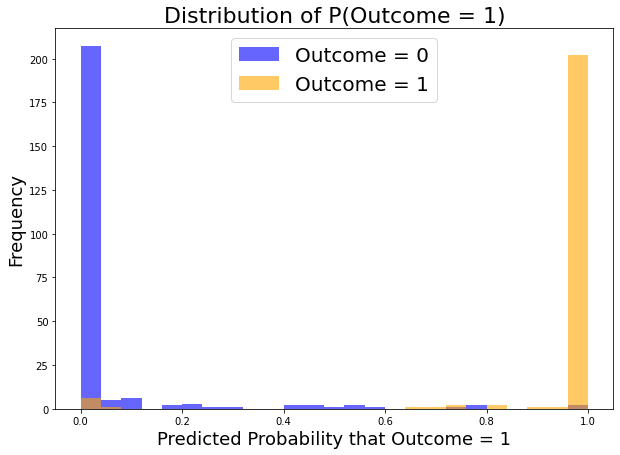

In [32]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

## Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.


## ROC Area Under Curve (AOC)

The more area under this blue curve is, the better separated our distributions are.


We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.


In [33]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [34]:
# Calculate score.
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9863977849204199

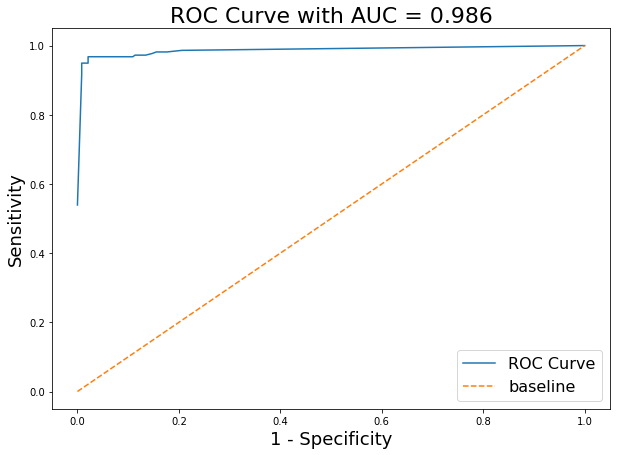

In [35]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Coefficients

In [36]:
# Restating best parameters obtained through GridSearchCV
gs_cvec_mnb_final.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [37]:
# Instantiate Count Vectorizer based on best parameters, fitting and transforming 

cvec_mnb_opt_vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.5, max_features = 500, min_df = 2)

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

X_train_cvec_mnb_opt = cvec_mnb_opt_vectorizer.fit_transform(X_train)

X_test_cvec_mnb_opt = cvec_mnb_opt_vectorizer.transform(X_test)

# Converting to array.
X_train_cvec_mnb_opt= X_train_cvec_mnb_opt.toarray()




In [38]:
# Fit Multinomial model to Count Vectorizer processed training data.

cvec_mnb_opt = MultinomialNB()

cvec_mnb_opt.fit(X_train_cvec_mnb_opt, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
# extracting optimum coefs of cvec_mnb model against feature variables,
# with exponentiated coeff rounded to 3 dec places:

cvec_mnb_opt_coefs = pd.DataFrame({'variable':cvec_mnb_opt_vectorizer.get_feature_names(),
                                      'coef':cvec_mnb_opt.coef_.T.ravel(),
                                      'abs_coef':np.abs(cvec_mnb_opt.coef_.T.ravel()),
                                        })

cvec_mnb_opt_coefs.sort_values('coef', inplace=True, ascending=False)


# reseting index, shows clear selection of top 10 and bottom 10 for next lines of code
cvec_mnb_opt_coefs.reset_index(drop=True,inplace=True)


# combining top 10 largest co-ef variables with bottom 10 co-ef variables
cvec_mnb_opt_coefs_top_btm_10 = pd.concat([cvec_mnb_opt_coefs.nlargest(10, 'coef'),cvec_mnb_opt_coefs.nsmallest(10, 'coef')[::-1]])
cvec_mnb_opt_coefs_top_btm_10

,variable,coef,abs_coef
0,room,-3.452176,3.452176
1,guest,-4.051750,4.051750
2,hotel,-4.110003,4.110003
3,night,-4.434042,4.434042
4,desk,-4.566896,4.566896
5,know,-4.594333,4.594333
6,come,-4.595725,4.595725
7,don,-4.602713,4.602713
8,day,-4.670905,4.670905
9,said,-4.731248,4.731248


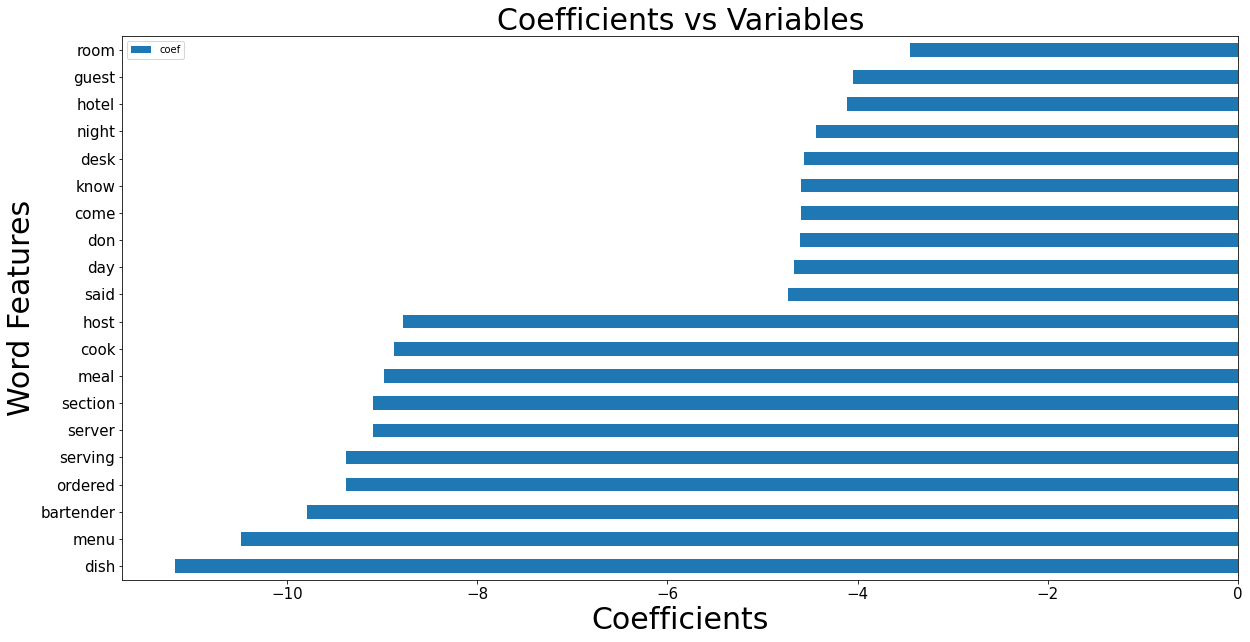

In [40]:
#plotting top 10 and bottom 10 coefs sorted in descending order to visualize the correlation of word features with the target class 1 - TalesFromYourServer
ax = cvec_mnb_opt_coefs_top_btm_10.sort_values('coef', ascending=True)[['variable','coef']].plot.barh('variable',figsize=(20,10))
ax.set_title("Coefficients vs Variables", fontsize=30)
ax.set_xlabel("Coefficients", fontsize=30)
ax.set_ylabel("Word Features", fontsize=30)
plt.xticks(size=15)
plt.yticks(size=15);


We interpret a one-unit increase in $X_i$ as follows:

"As $X_i$ increases by 1, I expect $Y$ to increase by a factor of ${\beta_1}$."

Example of interpreting coefficient:

As word-count of 'suite' increases by 1, probability of target variable, 'subreddit' being category 1: TalesFromYourServer decreases by 10.71 times.

## Count Vectorization and Logistic Regression Corpus Word Count

In [41]:
# converting X_train_cvec_mnb_opt into DataFrame
X_train_cvec_mnb_opt_df=pd.DataFrame(X_train_cvec_mnb_opt, columns = cvec_mnb_opt_vectorizer.get_feature_names())

In [42]:
# find out how many times each word appear in the corpus by creating a 'Total' row at the end of the dataframe:
X_train_cvec_mnb_opt_df.loc['Total',:]= X_train_cvec_mnb_opt_df.sum(axis=0)
X_train_cvec_mnb_opt_df.loc['Total',:].sort_values(ascending=False)

room     2308.0
guest    1391.0
don      1241.0
hotel    1188.0
know     1181.0
          ...  
wish       75.0
mad        75.0
leaf       75.0
dont       74.0
damn       74.0
Name: Total, Length: 500, dtype: float64

In [43]:
X_train_total_cvec_mnb_opt = pd.DataFrame(X_train_cvec_mnb_opt_df.loc['Total',:].sort_values(ascending=False))
print(X_train_total_cvec_mnb_opt.shape)
X_train_total_cvec_mnb_opt.head()

(500, 1)


,Total
room,2308.0
guest,1391.0
don,1241.0
hotel,1188.0
know,1181.0


In [44]:
# No. of modelled words fulfilling various appearance count thresholds:

print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 2]))
print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 10]))
print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 50]))
print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 500]))
print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 1000]))
print(len(X_train_total_cvec_mnb_opt.loc[X_train_total_cvec_mnb_opt['Total'] <= 1500]))


0
0
0
452
489
499


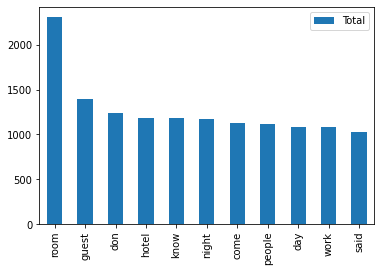

In [45]:
# plot histogram to observe the distribution

X_train_total_cvec_mnb_opt[X_train_total_cvec_mnb_opt.Total > 1000].plot(kind='bar');

## Count Vectorization and Logistic Regression Wordcloud Visualization

In [46]:
# Import Wordcloud 

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction import stop_words


In [47]:
# This wordcloud shows the relative influence of remaining features/words
# in training data left after cleaning and stopword removal, leading to Class 1, TalesFromTheFrontDesk prediction.
# stopwords keyword will remove 'english' stopwords

def wordcloud_gen_func(input_string):

    stopwords = set(stop_words.ENGLISH_STOP_WORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                          contour_width=5, contour_color='firebrick', collocations=False).generate(input_string)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [48]:
# instantiating wordcloud_string for visualisation

# converting float in cvec_mnb_opt_coefs['exp_coef'] to int for usage to form wordcloud_string:
cvec_mnb_opt_coefs['abs_coef']=cvec_mnb_opt_coefs['abs_coef'].apply(lambda i: int(i))

# forming wordcloud_string based on scalar-treated coefficients of cvec_mnb_opt_coefs

cvec_mnb_coef_wordcloud_string = ''
i = 0

# while loop to keep adding each word with a blank space after it, multiplied by its count:
while i < len(cvec_mnb_opt_coefs['variable']):
    cvec_mnb_coef_wordcloud_string += ((cvec_mnb_opt_coefs['variable'][i]+' ')*(int(100/(cvec_mnb_opt_coefs['abs_coef'][i]))))
    i += 1

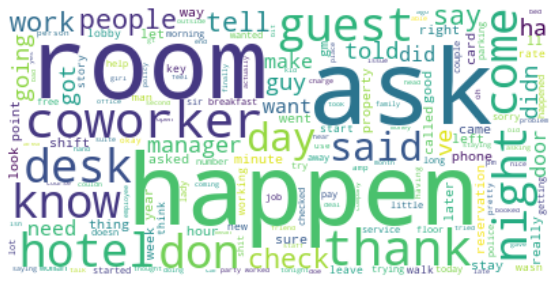

In [49]:
# This is the Count Vectorization and Multinomial Naive Bayes WordCloud on cvec_mnb_opt_coefs:

wordcloud_gen_func(cvec_mnb_coef_wordcloud_string)